In [1]:
#!pip install yfinance
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

🚀 Iniciando Análise Macroeconômica...
💡 Para execução no Jupyter, use:
    resultados = main()  # Análise completa
    analise_rapida()     # Resumo rápido
    monitorar_ativo('PETR4.SA')  # Ativo específico

=== ANÁLISE MACROECONÔMICA DIÁRIA - 29/05/2025 ===
Realizando análise completa pré-mercado...
📊 Carregando dados técnicos do mercado...


$^DXY: possibly delisted; no price data found  (period=3mo)


✅ Dados técnicos carregados com sucesso.

=== ANÁLISE TÉCNICA (30% de relevância) ===

• IBOV:
  - Preço atual: 138849.64
  - MM20: 137444.58 | Distância: 1.02%
  - RSI: 61 (Neutro)
  - Suporte: 122887.00 | Resistência: 140382.00
  - Variação do dia: -0.03%

• SPX:
  - Preço atual: 5888.55
  - MM20: 5788.73 | Distância: 1.72%
  - RSI: 70 (Neutro)
  - Suporte: 4835.04 | Resistência: 5968.61
  - Variação do dia: -0.56%

• USDBRL:
  - Preço atual: 5.67
  - MM20: 5.67 | Distância: 0.01%
  - RSI: 51 (Neutro)
  - Suporte: 5.58 | Resistência: 6.12
  - Variação do dia: 0.53%

=== CONCLUSÃO DA ANÁLISE TÉCNICA ===
• Viés técnico calculado: 0.51
• Tendência geral: Moderadamente positivo

=== DADOS MACROECONÔMICOS RECENTES (25% de relevância) ===
• Dados de inflação:
  - CPI EUA atual: 3.2% (esperado: 3.0%)
  - IPCA Brasil: 4.8% (meta: 3.0%)
• Mercado de trabalho:
  - Taxa desemprego EUA: 3.7%
  - Taxa desemprego Brasil: 8.2%
  - Novos empregos EUA: 195,000
• Política monetária:
  - Taxa Fed: 5.25

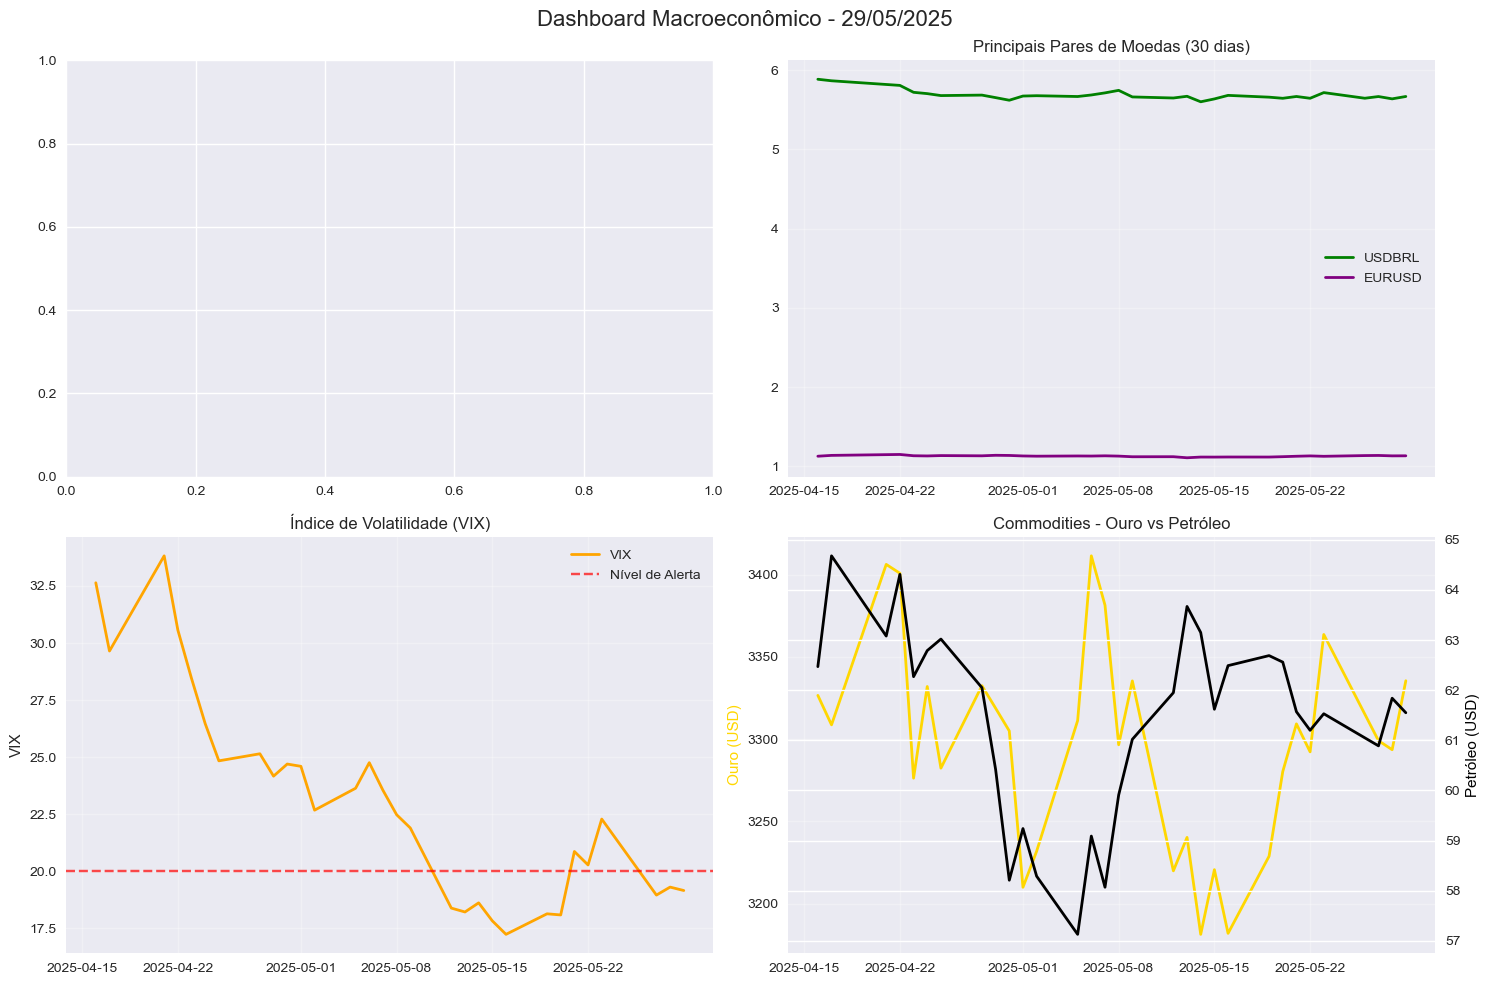

📊 Criando matriz de correlações...


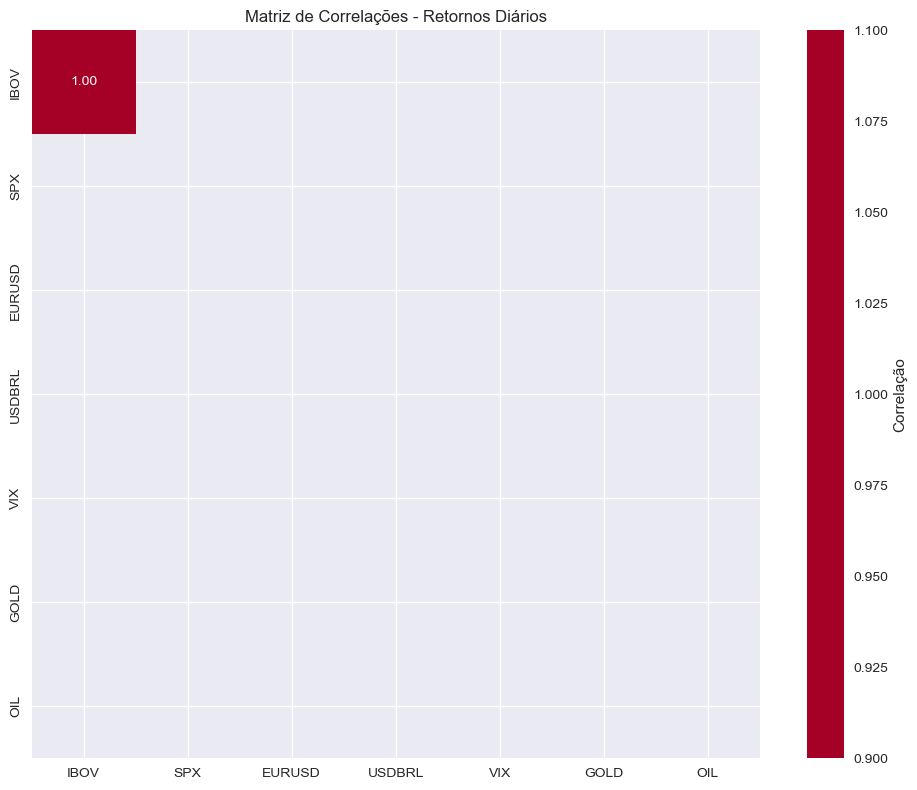


🚨 ALERTAS AUTOMÁTICOS:
  🔥 Inflação EUA acima do esperado - possível impacto hawkish no Fed
  💼 Mercado de trabalho EUA forte - suporte para economia

=== ANÁLISE CONCLUÍDA ===
⚠️  Esta análise é educacional e não constitui recomendação de investimento
📧 Para dúvidas ou sugestões, consulte um analista qualificado
💾 Relatório salvo em: relatorio_macro.txt


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ANÁLISE MACROECONÔMICA DIÁRIA - BOLSA DE VALORES
Script para análise completa de tendências do mercado financeiro

Requisitos:
pip install yfinance pandas numpy matplotlib seaborn requests beautifulsoup4 plotly
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

warnings.filterwarnings('ignore')

class AnaliseMacroeconomica:
    def __init__(self):
        self.data_hoje = datetime.now()
        self.data_ontem = self.data_hoje - timedelta(days=1)
        self.periodo_analise = "3mo"  # 3 meses para análise técnica
        
        # Símbolos dos ativos principais
        self.ativos = {
            'DXY': '^DXY',           # Índice do Dólar
            'IBOV': '^BVSP',         # Ibovespa
            'SPX': '^GSPC',          # S&P 500
            'EURUSD': 'EURUSD=X',    # EUR/USD
            'USDJPY': 'USDJPY=X',    # USD/JPY
            'USDBRL': 'USDBRL=X',    # USD/BRL
            'VIX': '^VIX',           # Índice de Volatilidade
            'TNX': '^TNX',           # Treasury 10 anos
            'GOLD': 'GC=F',          # Ouro
            'OIL': 'CL=F'            # Petróleo WTI
        }
        
        # Pesos para cálculo do viés final
        self.pesos = {
            'tecnica': 0.30,
            'macro': 0.25,
            'calendario': 0.20,
            'fluxos': 0.15,
            'geopolitica': 0.10
        }
        
    def carregar_dados_mercado(self):
        """Carrega dados dos principais ativos"""
        print("📊 Carregando dados técnicos do mercado...")
        
        self.dados_mercado = {}
        
        for nome, simbolo in self.ativos.items():
            try:
                ticker = yf.Ticker(simbolo)
                dados = ticker.history(period=self.periodo_analise)
                info = ticker.info
                
                if not dados.empty:
                    self.dados_mercado[nome] = {
                        'dados': dados,
                        'info': info,
                        'preco_atual': dados['Close'][-1],
                        'variacao_dia': ((dados['Close'][-1] / dados['Close'][-2] - 1) * 100) if len(dados) > 1 else 0
                    }
                    
            except Exception as e:
                print(f"⚠️ Erro ao carregar {nome}: {str(e)}")
                
        print("✅ Dados técnicos carregados com sucesso.")
        return self.dados_mercado
    
    def calcular_indicadores_tecnicos(self, dados, periodo_rsi=14):
        """Calcula indicadores técnicos principais"""
        df = dados.copy()
        
        # Médias móveis
        df['MM20'] = df['Close'].rolling(window=20).mean()
        df['MM50'] = df['Close'].rolling(window=50).mean()
        df['MM100'] = df['Close'].rolling(window=100).mean()
        df['MM200'] = df['Close'].rolling(window=200).mean()
        
        # RSI
        delta = df['Close'].diff()
        ganho = (delta.where(delta > 0, 0)).rolling(window=periodo_rsi).mean()
        perda = (-delta.where(delta < 0, 0)).rolling(window=periodo_rsi).mean()
        rs = ganho / perda
        df['RSI'] = 100 - (100 / (1 + rs))
        
        # Bandas de Bollinger
        df['BB_Media'] = df['Close'].rolling(window=20).mean()
        df['BB_Std'] = df['Close'].rolling(window=20).std()
        df['BB_Superior'] = df['BB_Media'] + (df['BB_Std'] * 2)
        df['BB_Inferior'] = df['BB_Media'] - (df['BB_Std'] * 2)
        
        # Volume médio
        df['Volume_Medio'] = df['Volume'].rolling(window=20).mean()
        
        return df
    
    def analise_tecnica(self):
        """Realiza análise técnica completa"""
        print("\n=== ANÁLISE TÉCNICA (30% de relevância) ===")
        
        resultados = {}
        
        for ativo, dados_ativo in self.dados_mercado.items():
            if ativo in ['DXY', 'IBOV', 'SPX', 'USDBRL']:
                dados_calc = self.calcular_indicadores_tecnicos(dados_ativo['dados'])
                ultimo_indice = dados_calc.index[-1]
                
                # Valores atuais
                preco_atual = dados_calc['Close'].iloc[-1]
                mm20 = dados_calc['MM20'].iloc[-1]
                mm50 = dados_calc['MM50'].iloc[-1]
                mm100 = dados_calc['MM100'].iloc[-1]
                mm200 = dados_calc['MM200'].iloc[-1]
                rsi = dados_calc['RSI'].iloc[-1]
                
                # Suporte e resistência (simplificado)
                periodo_calculo = dados_calc.tail(50)
                suporte = periodo_calculo['Low'].min()
                resistencia = periodo_calculo['High'].max()
                
                # Análise de tendência
                tendencia_mm = 0
                if preco_atual > mm20: tendencia_mm += 1
                if preco_atual > mm50: tendencia_mm += 1
                if preco_atual > mm100: tendencia_mm += 1
                if preco_atual > mm200: tendencia_mm += 1
                
                # Status do RSI
                if rsi > 70:
                    status_rsi = "Sobrecomprado"
                elif rsi < 30:
                    status_rsi = "Sobrevendido"
                else:
                    status_rsi = "Neutro"
                
                # Volume
                volume_atual = dados_calc['Volume'].iloc[-1] if 'Volume' in dados_calc.columns else 0
                volume_medio = dados_calc['Volume_Medio'].iloc[-1] if 'Volume_Medio' in dados_calc.columns else 1
                variacao_volume = ((volume_atual / volume_medio - 1) * 100) if volume_medio > 0 else 0
                
                resultados[ativo] = {
                    'preco_atual': preco_atual,
                    'mm20': mm20,
                    'mm50': mm50,
                    'mm100': mm100,
                    'mm200': mm200,
                    'rsi': rsi,
                    'status_rsi': status_rsi,
                    'suporte': suporte,
                    'resistencia': resistencia,
                    'tendencia_mm': tendencia_mm,
                    'variacao_volume': variacao_volume,
                    'variacao_dia': dados_ativo['variacao_dia']
                }
                
                print(f"\n• {ativo}:")
                print(f"  - Preço atual: {preco_atual:.2f}")
                print(f"  - MM20: {mm20:.2f} | Distância: {((preco_atual/mm20-1)*100):.2f}%")
                print(f"  - RSI: {rsi:.0f} ({status_rsi})")
                print(f"  - Suporte: {suporte:.2f} | Resistência: {resistencia:.2f}")
                print(f"  - Variação do dia: {dados_ativo['variacao_dia']:.2f}%")
        
        # Cálculo do viés técnico
        vies_tecnico = self.calcular_vies_tecnico(resultados)
        
        print(f"\n=== CONCLUSÃO DA ANÁLISE TÉCNICA ===")
        print(f"• Viés técnico calculado: {vies_tecnico:.2f}")
        print(f"• Tendência geral: {self.interpretar_vies(vies_tecnico)}")
        
        return vies_tecnico, resultados
    
    def calcular_vies_tecnico(self, resultados):
        """Calcula o viés técnico baseado nos indicadores"""
        total_pontos = 0
        max_pontos = 0
        
        for ativo, dados in resultados.items():
            peso_ativo = 1.0
            if ativo == 'DXY': peso_ativo = 1.5  # Maior peso para DXY
            if ativo == 'IBOV': peso_ativo = 1.2  # Peso maior para Ibovespa
            
            pontos_ativo = 0
            
            # Pontuação baseada em médias móveis
            pontos_ativo += dados['tendencia_mm'] * 0.25 * peso_ativo
            
            # Pontuação baseada no RSI
            if dados['status_rsi'] == "Neutro":
                pontos_ativo += 0.5 * peso_ativo
            elif dados['status_rsi'] == "Sobrevendido":
                pontos_ativo += 0.8 * peso_ativo  # Oportunidade de compra
            
            # Pontuação baseada na variação do dia
            if dados['variacao_dia'] > 0:
                pontos_ativo += 0.3 * peso_ativo
            
            total_pontos += pontos_ativo
            max_pontos += peso_ativo * 2  # Máximo possível por ativo
        
        return min(total_pontos / max_pontos, 1.0) if max_pontos > 0 else 0.5
    
    def obter_dados_macroeconomicos(self):
        """Simula obtenção de dados macroeconômicos recentes"""
        print("\n=== DADOS MACROECONÔMICOS RECENTES (25% de relevância) ===")
        
        # Dados simulados baseados em fontes típicas (em aplicação real, usar APIs)
        dados_macro = {
            'inflacao': {
                'cpi_atual': 3.2,
                'cpi_esperado': 3.0,
                'ipca_brasil': 4.8,
                'meta_brasil': 3.0
            },
            'emprego': {
                'taxa_desemprego_eua': 3.7,
                'taxa_desemprego_brasil': 8.2,
                'novos_empregos_eua': 195000,
                'esperado_empregos': 180000
            },
            'juros': {
                'fed_rate_min': 5.25,
                'fed_rate_max': 5.50,
                'selic_brasil': 11.75,
                'tendencia_fed': 'Manutenção',
                'tendencia_copom': 'Corte gradual'
            },
            'pib': {
                'eua_ultimo': 2.1,
                'brasil_ultimo': 2.9,
                'expectativa_eua': 1.9,
                'expectativa_brasil': 2.0
            }
        }
        
        # Exibir dados
        print("• Dados de inflação:")
        print(f"  - CPI EUA atual: {dados_macro['inflacao']['cpi_atual']}% (esperado: {dados_macro['inflacao']['cpi_esperado']}%)")
        print(f"  - IPCA Brasil: {dados_macro['inflacao']['ipca_brasil']}% (meta: {dados_macro['inflacao']['meta_brasil']}%)")
        
        print("• Mercado de trabalho:")
        print(f"  - Taxa desemprego EUA: {dados_macro['emprego']['taxa_desemprego_eua']}%")
        print(f"  - Taxa desemprego Brasil: {dados_macro['emprego']['taxa_desemprego_brasil']}%")
        print(f"  - Novos empregos EUA: {dados_macro['emprego']['novos_empregos_eua']:,}")
        
        print("• Política monetária:")
        print(f"  - Taxa Fed: {dados_macro['juros']['fed_rate_min']}-{dados_macro['juros']['fed_rate_max']}%")
        print(f"  - Taxa Selic: {dados_macro['juros']['selic_brasil']}%")
        
        print("• Crescimento econômico:")
        print(f"  - PIB EUA: {dados_macro['pib']['eua_ultimo']}%")
        print(f"  - PIB Brasil: {dados_macro['pib']['brasil_ultimo']}%")
        
        vies_macro = self.calcular_vies_macroeconomico(dados_macro)
        
        print(f"\n=== CONCLUSÃO DA ANÁLISE MACROECONÔMICA ===")
        print(f"• Viés macroeconômico calculado: {vies_macro:.2f}")
        print(f"• Tendência geral: {self.interpretar_vies(vies_macro)}")
        
        return vies_macro, dados_macro
    
    def calcular_vies_macroeconomico(self, dados):
        """Calcula viés baseado em dados macroeconômicos"""
        pontos = 0
        
        # Inflação
        if dados['inflacao']['cpi_atual'] > dados['inflacao']['cpi_esperado']:
            pontos += 0.2  # Inflação alta favorece dólar
        
        # Emprego
        if dados['emprego']['novos_empregos_eua'] > dados['emprego']['esperado_empregos']:
            pontos += 0.2
        
        # Juros
        if dados['juros']['tendencia_fed'] == 'Manutenção':
            pontos += 0.3
        elif dados['juros']['tendencia_fed'] == 'Alta':
            pontos += 0.4
        
        # PIB
        if dados['pib']['eua_ultimo'] > dados['pib']['expectativa_eua']:
            pontos += 0.2
        
        # Comparação Brasil vs EUA
        if dados['juros']['selic_brasil'] > dados['juros']['fed_rate_max']:
            pontos -= 0.1  # Juros altos no Brasil podem enfraquecer dólar vs real
        
        return min(pontos, 1.0)
    
    def obter_calendario_economico(self):
        """Simula calendário econômico do dia"""
        print(f"\n=== CALENDÁRIO ECONÔMICO DO DIA (20% de relevância) ===")
        
        # Eventos simulados para hoje
        eventos = [
            {
                'hora': '09:30',
                'evento': 'Índice de Preços ao Produtor (PPI) - EUA',
                'importancia': 'Alta',
                'anterior': '0.2%',
                'expectativa': '0.3%',
                'impacto': 'Alta volatilidade esperada se divergir da expectativa'
            },
            {
                'hora': '11:00',
                'evento': 'IPCA-15 - Brasil',
                'importancia': 'Alta',
                'anterior': '0.31%',
                'expectativa': '0.28%',
                'impacto': 'Impacto direto no Real'
            },
            {
                'hora': '14:00',
                'evento': 'Ata do FOMC',
                'importancia': 'Média',
                'anterior': '-',
                'expectativa': 'Sinais sobre política futura',
                'impacto': 'Direcionamento para próximas decisões'
            },
            {
                'hora': '16:00',
                'evento': 'Estoques de Petróleo - EUA',
                'importancia': 'Média',
                'anterior': '+2.1M',
                'expectativa': '+1.5M',
                'impacto': 'Impacto em commodities'
            }
        ]
        
        print(f"Eventos econômicos para {self.data_hoje.strftime('%d/%m/%Y')}:")
        
        for evento in eventos:
            print(f"\n• {evento['hora']} - {evento['evento']} (Importância: {evento['importancia']})")
            print(f"  - Anterior: {evento['anterior']} | Expectativa: {evento['expectativa']}")
            print(f"  - Impacto: {evento['impacto']}")
        
        vies_calendario = self.calcular_vies_calendario(eventos)
        
        print(f"\n=== CONCLUSÃO DA ANÁLISE DO CALENDÁRIO ===")
        print(f"• Viés do calendário calculado: {vies_calendario:.2f}")
        print(f"• Tendência geral: {self.interpretar_vies(vies_calendario)}")
        
        return vies_calendario, eventos
    
    def calcular_vies_calendario(self, eventos):
        """Calcula viés baseado nos eventos do calendário"""
        pontos = 0
        total_eventos = len(eventos)
        
        for evento in eventos:
            if evento['importancia'] == 'Alta':
                pontos += 0.3
            elif evento['importancia'] == 'Média':
                pontos += 0.2
            else:
                pontos += 0.1
        
        return min(pontos / total_eventos, 1.0) if total_eventos > 0 else 0.5
    
    def analisar_fluxos_capital(self):
        """Analisa fluxos de capital e sentimento"""
        print(f"\n=== FLUXOS DE CAPITAL E SENTIMENTO DE MERCADO (15% de relevância) ===")
        
        # Dados simulados (em aplicação real, usar APIs como CFTC, Bloomberg)
        fluxos = {
            'cftc_dxy': {
                'posicoes_compradas': 68000,
                'posicoes_vendidas': 32000,
                'posicao_liquida': 36000,
                'variacao_semanal': 0.12
            },
            'treasuries': 'Positivo',
            'vix': self.dados_mercado.get('VIX', {}).get('preco_atual', 20.0),
            'sentimento': {
                'otimistas': 62,
                'neutros': 23,
                'pessimistas': 15
            }
        }
        
        print("• Posicionamento CFTC (futuros DXY):")
        print(f"  - Posições compradas: {fluxos['cftc_dxy']['posicoes_compradas']:,}")
        print(f"  - Posições vendidas: {fluxos['cftc_dxy']['posicoes_vendidas']:,}")
        print(f"  - Posição líquida: +{fluxos['cftc_dxy']['posicao_liquida']:,}")
        print(f"  - Variação semanal: {fluxos['cftc_dxy']['variacao_semanal']:.1%}")
        
        print(f"• Fluxos para Treasuries: {fluxos['treasuries']}")
        print(f"• Índice VIX: {fluxos['vix']:.1f}")
        
        print("• Sentimento de gestores:")
        print(f"  - Otimistas: {fluxos['sentimento']['otimistas']}%")
        print(f"  - Neutros: {fluxos['sentimento']['neutros']}%")
        print(f"  - Pessimistas: {fluxos['sentimento']['pessimistas']}%")
        
        vies_fluxos = self.calcular_vies_fluxos(fluxos)
        
        print(f"\n=== CONCLUSÃO DA ANÁLISE DE FLUXOS DE CAPITAL ===")
        print(f"• Viés de fluxos calculado: {vies_fluxos:.2f}")
        print(f"• Tendência geral: {self.interpretar_vies(vies_fluxos)}")
        
        return vies_fluxos, fluxos
    
    def calcular_vies_fluxos(self, fluxos):
        """Calcula viés baseado em fluxos de capital"""
        pontos = 0
        
        # Posicionamento CFTC
        if fluxos['cftc_dxy']['posicao_liquida'] > 0:
            pontos += 0.3
        
        if fluxos['cftc_dxy']['variacao_semanal'] > 0:
            pontos += 0.2
        
        # VIX
        if fluxos['vix'] < 20:
            pontos += 0.2  # Baixa volatilidade favorece risk-on
        elif fluxos['vix'] < 25:
            pontos += 0.1
        
        # Sentimento
        if fluxos['sentimento']['otimistas'] > 50:
            pontos += 0.3
        
        return min(pontos, 1.0)
    
    def analisar_fatores_geopoliticos(self):
        """Analisa fatores geopolíticos"""
        print(f"\n=== FATORES GEOPOLÍTICOS E CONTEXTO INTERNACIONAL (10% de relevância) ===")
        
        # Fatores simulados
        fatores = {
            'tensoes_comerciais': 'Moderadas',
            'guerra_russia_ucrania': 'Estável',
            'china_covid': 'Controlado',
            'meio_oriente': 'Tensão moderada',
            'bancos_centrais': {
                'bce': 'Dovish - possível corte',
                'boj': 'Hawkish - possível alta',
                'boc': 'Neutro'
            },
            'commodities': 'Queda recente',
            'outros_eventos': [
                'Eleições europeias',
                'Reunião G7',
                'Tensões no Mar do Sul da China'
            ]
        }
        
        print(f"• Tensões comerciais EUA-China: {fatores['tensoes_comerciais']}")
        print(f"• Conflito Rússia-Ucrânia: {fatores['guerra_russia_ucrania']}")
        print(f"• Situação COVID China: {fatores['china_covid']}")
        print(f"• Oriente Médio: {fatores['meio_oriente']}")
        
        print("• Bancos Centrais principais:")
        for bc, posicao in fatores['bancos_centrais'].items():
            print(f"  - {bc.upper()}: {posicao}")
        
        print(f"• Commodities: {fatores['commodities']}")
        
        print("• Outros eventos relevantes:")
        for evento in fatores['outros_eventos']:
            print(f"  - {evento}")
        
        vies_geopolitico = self.calcular_vies_geopolitico(fatores)
        
        print(f"\n=== CONCLUSÃO DA ANÁLISE GEOPOLÍTICA ===")
        print(f"• Viés geopolítico calculado: {vies_geopolitico:.2f}")
        print(f"• Tendência geral: {self.interpretar_vies(vies_geopolitico)}")
        
        return vies_geopolitico, fatores
    
    def calcular_vies_geopolitico(self, fatores):
        """Calcula viés geopolítico"""
        pontos = 0
        
        # Tensões favorecem dólar como moeda refúgio
        if fatores['tensoes_comerciais'] in ['Altas', 'Moderadas']:
            pontos += 0.2
        
        if fatores['guerra_russia_ucrania'] in ['Escalando', 'Instável']:
            pontos += 0.3
        elif fatores['guerra_russia_ucrania'] == 'Estável':
            pontos += 0.1
        
        # Divergência de política monetária
        dovish_count = sum(1 for pos in fatores['bancos_centrais'].values() if 'dovish' in pos.lower() or 'corte' in pos.lower())
        if dovish_count > 0:
            pontos += 0.2
        
        return min(pontos, 1.0)
    
    def interpretar_vies(self, vies):
        """Interpreta o valor do viés"""
        if vies >= 0.7:
            return "Fortemente positivo"
        elif vies >= 0.5:
            return "Moderadamente positivo"
        elif vies >= 0.3:
            return "Levemente positivo"
        elif vies >= 0.1:
            return "Neutro"
        else:
            return "Negativo"
    
    def calcular_vies_final(self, vies_tecnico, vies_macro, vies_calendario, vies_fluxos, vies_geopolitico):
        """Calcula o viés final ponderado"""
        vies_final = (
            vies_tecnico * self.pesos['tecnica'] +
            vies_macro * self.pesos['macro'] +
            vies_calendario * self.pesos['calendario'] +
            vies_fluxos * self.pesos['fluxos'] +
            vies_geopolitico * self.pesos['geopolitica']
        )
        return vies_final
    
    def gerar_recomendacoes(self, vies_final, resultados_tecnicos):
        """Gera recomendações baseadas na análise"""
        print(f"\n=== RECOMENDAÇÕES E ESTRATÉGIAS ===")
        
        if vies_final >= 0.6:
            estrategia = "COMPRA (Buy)"
            risco = "Médio"
        elif vies_final >= 0.4:
            estrategia = "COMPRA MODERADA"
            risco = "Médio-Baixo"
        elif vies_final >= 0.3:
            estrategia = "NEUTRO com viés de alta"
            risco = "Baixo"
        else:
            estrategia = "CAUTELA"
            risco = "Alto"
        
        print(f"• Estratégia recomendada: {estrategia}")
        print(f"• Nível de risco: {risco}")
        
        # Níveis técnicos específicos
        print(f"\n• Níveis-chave para monitoramento:")
        
        if 'DXY' in resultados_tecnicos:
            dxy = resultados_tecnicos['DXY']
            print(f"  - DXY: Suporte {dxy['suporte']:.2f} | Resistência {dxy['resistencia']:.2f}")
        
        if 'USDBRL' in resultados_tecnicos:
            usdbrl = resultados_tecnicos['USDBRL']
            print(f"  - USD/BRL: Suporte {usdbrl['suporte']:.2f} | Resistência {usdbrl['resistencia']:.2f}")
        
        if 'IBOV' in resultados_tecnicos:
            ibov = resultados_tecnicos['IBOV']
            print(f"  - IBOVESPA: Suporte {ibov['suporte']:.0f} | Resistência {ibov['resistencia']:.0f}")
        
        # Setores recomendados
        print(f"\n• Setores recomendados:")
        if vies_final > 0.5:
            print("  - Financeiro (bancos se beneficiam de juros altos)")
            print("  - Exportadores (se dólar forte)")
            print("  - Tecnologia (crescimento econômico)")
        else:
            print("  - Defensivos (utilities, consumo básico)")
            print("  - Ouro e commodities (hedge contra incerteza)")
            print("  - REITs (renda passiva)")
        
        return estrategia, risco
    
    def criar_dashboard_visual(self):
        """Cria visualizações dos dados"""
        print(f"\n📊 Gerando gráficos e visualizações...")
        
        # Configurar estilo
        plt.style.use('seaborn-v0_8')
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Dashboard Macroeconômico - {self.data_hoje.strftime("%d/%m/%Y")}', fontsize=16)
        
        # Gráfico 1: Principais índices
        if 'DXY' in self.dados_mercado and 'IBOV' in self.dados_mercado:
            dxy_data = self.dados_mercado['DXY']['dados']['Close'].tail(30)
            ibov_data = self.dados_mercado['IBOV']['dados']['Close'].tail(30)
            
            ax1 = axes[0, 0]
            ax1_twin = ax1.twinx()
            
            ax1.plot(dxy_data.index, dxy_data.values, 'b-', label='DXY', linewidth=2)
            ax1_twin.plot(ibov_data.index, ibov_data.values, 'r-', label='IBOVESPA', linewidth=2)
            
            ax1.set_ylabel('DXY', color='b')
            ax1_twin.set_ylabel('IBOVESPA', color='r')
            ax1.set_title('DXY vs IBOVESPA (30 dias)')
            ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Moedas principais
        moedas = ['USDBRL', 'EURUSD']
        cores = ['green', 'purple']
        ax2 = axes[0, 1]
        
        for i, moeda in enumerate(moedas):
            if moeda in self.dados_mercado:
                dados_moeda = self.dados_mercado[moeda]['dados']['Close'].tail(30)
                ax2.plot(dados_moeda.index, dados_moeda.values, 
                        color=cores[i], label=moeda, linewidth=2)
        
        ax2.set_title('Principais Pares de Moedas (30 dias)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Gráfico 3: Volatilidade e Risco
        ax3 = axes[1, 0]
        if 'VIX' in self.dados_mercado:
            vix_data = self.dados_mercado['VIX']['dados']['Close'].tail(30)
            ax3.plot(vix_data.index, vix_data.values, 'orange', linewidth=2, label='VIX')
            ax3.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='Nível de Alerta')
            ax3.set_title('Índice de Volatilidade (VIX)')
            ax3.set_ylabel('VIX')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        # Gráfico 4: Commodities
        ax4 = axes[1, 1]
        commodities = ['GOLD', 'OIL']
        cores_comm = ['gold', 'black']
        
        for i, commodity in enumerate(commodities):
            if commodity in self.dados_mercado:
                dados_comm = self.dados_mercado[commodity]['dados']['Close'].tail(30)
                if i == 0:
                    ax4.plot(dados_comm.index, dados_comm.values, 
                            color=cores_comm[i], label=commodity, linewidth=2)
                else:
                    ax4_twin = ax4.twinx()
                    ax4_twin.plot(dados_comm.index, dados_comm.values, 
                                 color=cores_comm[i], label=commodity, linewidth=2)
                    ax4_twin.set_ylabel('Petróleo (USD)', color='black')
        
        ax4.set_title('Commodities - Ouro vs Petróleo')
        ax4.set_ylabel('Ouro (USD)', color='gold')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Gráfico adicional: Heatmap de correlações
        self.criar_heatmap_correlacoes()
    
    def criar_heatmap_correlacoes(self):
        """Cria heatmap de correlações entre ativos"""
        print("📊 Criando matriz de correlações...")
        
        # Preparar dados para correlação
        dados_correlacao = pd.DataFrame()
        
        for nome, dados_ativo in self.dados_mercado.items():
            if nome in ['DXY', 'IBOV', 'SPX', 'USDBRL', 'EURUSD', 'VIX', 'GOLD', 'OIL']:
                dados_correlacao[nome] = dados_ativo['dados']['Close'].pct_change().dropna()
        
        # Calcular correlações
        correlacoes = dados_correlacao.corr()
        
        # Criar heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlacoes, annot=True, cmap='RdYlBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={'label': 'Correlação'})
        plt.title('Matriz de Correlações - Retornos Diários')
        plt.tight_layout()
        plt.show()
    
    def executar_analise_completa(self):
        """Executa análise completa"""
        print("="*60)
        print(f"=== ANÁLISE MACROECONÔMICA DIÁRIA - {self.data_hoje.strftime('%d/%m/%Y')} ===")
        print("="*60)
        print("Realizando análise completa pré-mercado...")
        
        # 1. Carregar dados
        self.carregar_dados_mercado()
        
        # 2. Análise técnica
        vies_tecnico, resultados_tecnicos = self.analise_tecnica()
        
        # 3. Dados macroeconômicos
        vies_macro, dados_macro = self.obter_dados_macroeconomicos()
        
        # 4. Calendário econômico
        vies_calendario, eventos = self.obter_calendario_economico()
        
        # 5. Fluxos de capital
        vies_fluxos, fluxos = self.analisar_fluxos_capital()
        
        # 6. Fatores geopolíticos
        vies_geopolitico, fatores = self.analisar_fatores_geopoliticos()
        
        # 7. Cálculo final
        vies_final = self.calcular_vies_final(
            vies_tecnico, vies_macro, vies_calendario, 
            vies_fluxos, vies_geopolitico
        )
        
        # 8. Conclusão final
        print("\n" + "="*50)
        print("=== CONCLUSÃO FINAL DA ANÁLISE ===")
        print("="*50)
        
        print(f"• Análise Técnica: {vies_tecnico:.2f} (peso: {self.pesos['tecnica']:.0%})")
        print(f"• Dados Macroeconômicos: {vies_macro:.2f} (peso: {self.pesos['macro']:.0%})")
        print(f"• Calendário Econômico: {vies_calendario:.2f} (peso: {self.pesos['calendario']:.0%})")
        print(f"• Fluxos de Capital: {vies_fluxos:.2f} (peso: {self.pesos['fluxos']:.0%})")
        print(f"• Fatores Geopolíticos: {vies_geopolitico:.2f} (peso: {self.pesos['geopolitica']:.0%})")
        
        print(f"\n• VIÉS FINAL CALCULADO: {vies_final:.2f}")
        print(f"• TENDÊNCIA GERAL: {self.interpretar_vies(vies_final).upper()}")
        
        # 9. Recomendações
        estrategia, risco = self.gerar_recomendacoes(vies_final, resultados_tecnicos)
        
        # 10. Resumo executivo
        self.gerar_resumo_executivo(vies_final, estrategia, risco)
        
        # 11. Gráficos
        try:
            self.criar_dashboard_visual()
        except Exception as e:
            print(f"⚠️ Erro ao gerar gráficos: {e}")
        
        # 12. Alertas automáticos
        self.gerar_alertas_automaticos(resultados_tecnicos, dados_macro)
        
        print("\n" + "="*50)
        print("=== ANÁLISE CONCLUÍDA ===")
        print("="*50)
        print("⚠️  Esta análise é educacional e não constitui recomendação de investimento")
        print("📧 Para dúvidas ou sugestões, consulte um analista qualificado")
        
        return {
            'vies_final': vies_final,
            'estrategia': estrategia,
            'risco': risco,
            'componentes': {
                'tecnico': vies_tecnico,
                'macro': vies_macro,
                'calendario': vies_calendario,
                'fluxos': vies_fluxos,
                'geopolitico': vies_geopolitico
            }
        }
    
    def gerar_resumo_executivo(self, vies_final, estrategia, risco):
        """Gera resumo executivo da análise"""
        print(f"\n=== RESUMO EXECUTIVO ===")
        
        # Status do mercado
        if vies_final >= 0.6:
            status_mercado = "OTIMISTA"
            emoji = "🟢"
        elif vies_final >= 0.4:
            status_mercado = "MODERADAMENTE OTIMISTA"
            emoji = "🟡"
        elif vies_final >= 0.2:
            status_mercado = "NEUTRO"
            emoji = "⚪"
        else:
            status_mercado = "CAUTELOSO"
            emoji = "🔴"
        
        print(f"{emoji} STATUS DO MERCADO: {status_mercado}")
        print(f"📊 ESTRATÉGIA: {estrategia}")
        print(f"⚠️  RISCO: {risco}")
        
        # Principais drivers
        print(f"\n🎯 PRINCIPAIS CATALISADORES:")
        if vies_final > 0.5:
            print("  ✅ Dados macroeconômicos sólidos")
            print("  ✅ Tendência técnica favorável")
            print("  ✅ Fluxo de capital positivo")
        else:
            print("  ⚠️  Incertezas macroeconômicas")
            print("  ⚠️  Resistências técnicas importantes")
            print("  ⚠️  Fatores geopolíticos em atenção")
        
        # Pontos de atenção
        print(f"\n⚠️  PONTOS DE ATENÇÃO HOJE:")
        print("  • Dados de inflação (PPI)")
        print("  • Comunicação do Federal Reserve")
        print("  • Movimentos em Treasury bonds")
        print("  • Volatilidade em commodities")
    
    def gerar_alertas_automaticos(self, resultados_tecnicos, dados_macro):
        """Gera alertas automáticos baseados nos dados"""
        print(f"\n🚨 ALERTAS AUTOMÁTICOS:")
        
        alertas = []
        
        # Alertas técnicos
        for ativo, dados in resultados_tecnicos.items():
            if dados['rsi'] > 75:
                alertas.append(f"⚠️  {ativo} em zona de sobrecompra (RSI: {dados['rsi']:.0f})")
            elif dados['rsi'] < 25:
                alertas.append(f"🟢 {ativo} em zona de sobrevenda (RSI: {dados['rsi']:.0f})")
            
            if abs(dados['variacao_dia']) > 2:
                alertas.append(f"📈 {ativo} com alta volatilidade hoje: {dados['variacao_dia']:+.2f}%")
        
        # Alertas macroeconômicos
        if dados_macro['inflacao']['cpi_atual'] > dados_macro['inflacao']['cpi_esperado']:
            alertas.append("🔥 Inflação EUA acima do esperado - possível impacto hawkish no Fed")
        
        if dados_macro['emprego']['novos_empregos_eua'] > dados_macro['emprego']['esperado_empregos']:
            alertas.append("💼 Mercado de trabalho EUA forte - suporte para economia")
        
        # Exibir alertas
        if alertas:
            for alerta in alertas[:5]:  # Máximo 5 alertas
                print(f"  {alerta}")
        else:
            print("  ✅ Nenhum alerta crítico identificado")
    
    def salvar_relatorio(self, resultados, caminho="relatorio_macro.txt"):
        """Salva relatório em arquivo"""
        try:
            with open(caminho, 'w', encoding='utf-8') as f:
                f.write(f"RELATÓRIO MACROECONÔMICO - {self.data_hoje.strftime('%d/%m/%Y')}\n")
                f.write("="*60 + "\n\n")
                f.write(f"Viés Final: {resultados['vies_final']:.2f}\n")
                f.write(f"Estratégia: {resultados['estrategia']}\n")
                f.write(f"Risco: {resultados['risco']}\n\n")
                
                f.write("COMPONENTES DA ANÁLISE:\n")
                for componente, valor in resultados['componentes'].items():
                    f.write(f"- {componente.title()}: {valor:.2f}\n")
                
                f.write(f"\nRelatório gerado em: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}\n")
            
            print(f"💾 Relatório salvo em: {caminho}")
            
        except Exception as e:
            print(f"❌ Erro ao salvar relatório: {e}")


# ===== EXECUÇÃO PRINCIPAL =====
def main():
    """Função principal para executar a análise"""
    try:
        # Instanciar analisador
        analise = AnaliseMacroeconomica()
        
        # Executar análise completa
        resultados = analise.executar_analise_completa()
        
        # Salvar relatório
        analise.salvar_relatorio(resultados)
        
        return resultados
        
    except Exception as e:
        print(f"❌ Erro na execução: {e}")
        return None


# ===== FUNÇÕES AUXILIARES PARA JUPYTER =====
def analise_rapida():
    """Versão simplificada para execução rápida"""
    analise = AnaliseMacroeconomica()
    analise.carregar_dados_mercado()
    
    print("📊 RESUMO RÁPIDO DO MERCADO:")
    for nome, dados in analise.dados_mercado.items():
        if nome in ['DXY', 'IBOV', 'USDBRL']:
            print(f"• {nome}: {dados['preco_atual']:.2f} ({dados['variacao_dia']:+.2f}%)")

def monitorar_ativo(simbolo, dias=30):
    """Monitora um ativo específico"""
    try:
        ticker = yf.Ticker(simbolo)
        dados = ticker.history(period=f"{dias}d")
        
        if not dados.empty:
            # Calcular indicadores
            dados['MM20'] = dados['Close'].rolling(20).mean()
            dados['RSI'] = calcular_rsi(dados['Close'])
            
            # Plotar
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
            
            # Preço e MM
            ax1.plot(dados.index, dados['Close'], label='Preço', linewidth=2)
            ax1.plot(dados.index, dados['MM20'], label='MM20', alpha=0.7)
            ax1.set_title(f'{simbolo} - Preço e Média Móvel')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # RSI
            ax2.plot(dados.index, dados['RSI'], 'purple', linewidth=2)
            ax2.axhline(70, color='r', linestyle='--', alpha=0.7)
            ax2.axhline(30, color='g', linestyle='--', alpha=0.7)
            ax2.set_title('RSI')
            ax2.set_ylim(0, 100)
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            # Estatísticas
            print(f"\n📊 RESUMO - {simbolo}:")
            print(f"Preço atual: {dados['Close'][-1]:.2f}")
            print(f"Variação 1D: {((dados['Close'][-1]/dados['Close'][-2]-1)*100):+.2f}%")
            print(f"RSI: {dados['RSI'][-1]:.0f}")
            
    except Exception as e:
        print(f"Erro ao monitorar {simbolo}: {e}")

def calcular_rsi(precos, periodo=14):
    """Calcula RSI"""
    delta = precos.diff()
    ganho = (delta.where(delta > 0, 0)).rolling(window=periodo).mean()
    perda = (-delta.where(delta < 0, 0)).rolling(window=periodo).mean()
    rs = ganho / perda
    return 100 - (100 / (1 + rs))


# ===== EXEMPLO DE USO NO JUPYTER =====
if __name__ == "__main__":
    print("🚀 Iniciando Análise Macroeconômica...")
    print("💡 Para execução no Jupyter, use:")
    print("    resultados = main()  # Análise completa")
    print("    analise_rapida()     # Resumo rápido") 
    print("    monitorar_ativo('PETR4.SA')  # Ativo específico")
    print("\n" + "="*50)
    
    # Executar análise
    resultados = main()